# Employee Attrition Analysis and Prediction

## Problem Statement:

Employee turnover poses a significant challenge for organizations, resulting in increased costs, reduced productivity, and team disruptions. Understanding the factors driving attrition and predicting at-risk employees is critical for effective retention strategies. This project aims to analyze employee data, identify key drivers of attrition, and build predictive models to support proactive decision-making in workforce management.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
#Show all columns and all rows in output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Read the Dataset

In [3]:
df = pd.read_csv('Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Computing size of the dataset

In [5]:
print("The shape of the Dataset: ", df.shape)

print("Number of Rows in the Dataset: ",len(df))

print("Number of Columns in the Dataset: ", len(df.columns))

The shape of the Dataset:  (1470, 35)
Number of Rows in the Dataset:  1470
Number of Columns in the Dataset:  35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Checking for Missing values

In [7]:
#MISSING VALUES PER COLUMN
count=df.isnull().sum()
percentage=(df.isnull().sum()/len(df))*100
missing_values=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
missing_values

,count,percentage
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


### Checking for Duplicates

In [8]:
# Check Duplicates
duplicates = df[df.duplicated()]
print("Total duplicate rows:",len(duplicates))

Total duplicate rows: 0


### Descriptive Analysis on Numerical Attributes

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**INFERENCE:**

* **AGE** - The youngest employee is 18, so everyone is adult. The **OVer 18** column is not useful.
* **Employeecount & StandardHours** - These columns have the same values for all the employee, they don't give any new information.
* **EmployeeNumber** - This is just an ID number to each employee, it doesn't help us understand or predict anything
* Hence we can drop these attributes

### Drop unnecessay columns

In [10]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [11]:
df.shape

(1470, 31)

### Descriptive analysis on categorical columns

In [12]:
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


### Checking value counts of categorical attributes

In [13]:
categorical_features = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        categorical_features.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================================================================")
categorical_features.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

# ----------------------------**Exploratory Data Analysis**---------------------------

### Distribution of Target variables

#### ----------------------------------------------------**Predicting Employee Attrition**-----------------------------------------------

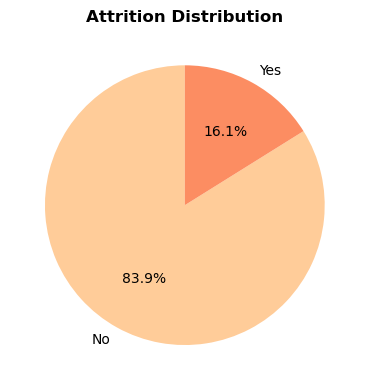

In [14]:
plt.figure(figsize=(5,4))
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#FFCC99', '#fc8d62'], startangle=90)
plt.title("Attrition Distribution", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### ------------------------------------------------**Predicting Employee Promotion Likelihood**-----------------------------------------------

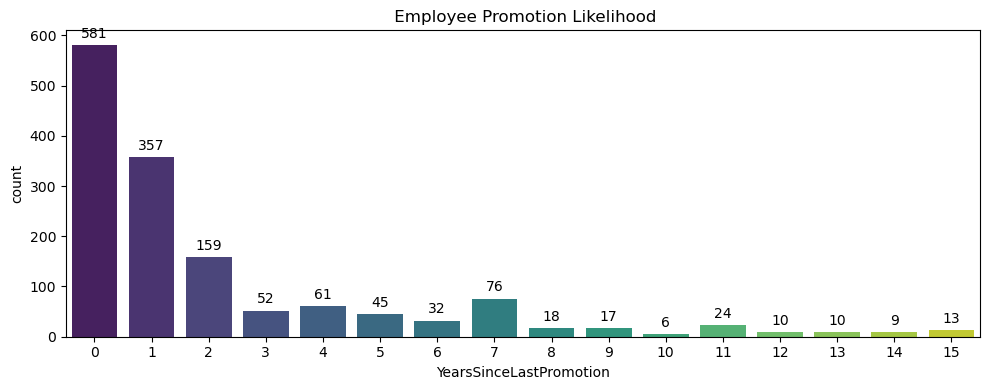

In [15]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='YearsSinceLastPromotion', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)
plt.title(" Employee Promotion Likelihood")
plt.tight_layout()
plt.show()

### Numerical Feature Distribution

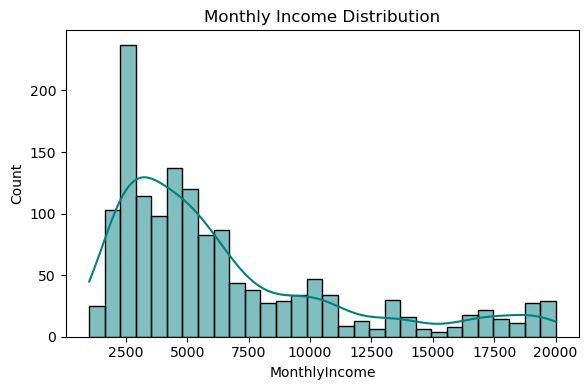

In [16]:
#Monthly Income distribution

plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True, color='teal', edgecolor='black')
plt.title("Monthly Income Distribution")
plt.tight_layout()
plt.show()


**INFERENCE:**

Most employees earn lower salaries, while only few have very high income, showing a right-skewed income distribution.

Text(0.5, 1.0, 'Age Distribution')

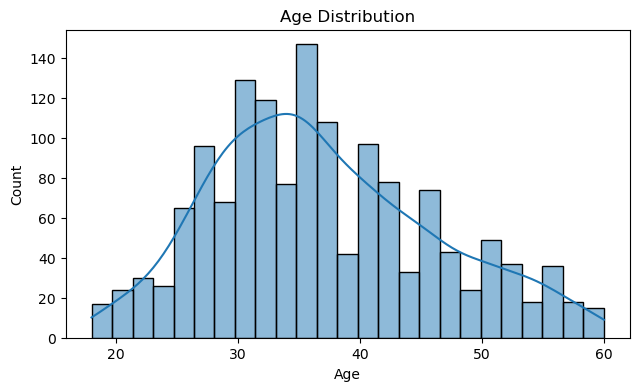

In [17]:
#Age Distribution

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=25, kde=True,  edgecolor='black')
plt.title("Age Distribution")

### Relationship Between Features and Attrition

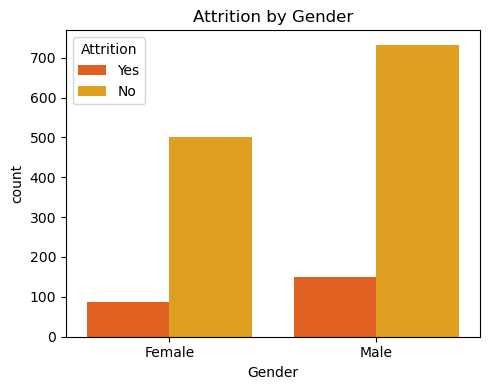

In [18]:
# Gender vs Attrition
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='autumn')
plt.title("Attrition by Gender")
plt.tight_layout()
plt.show()

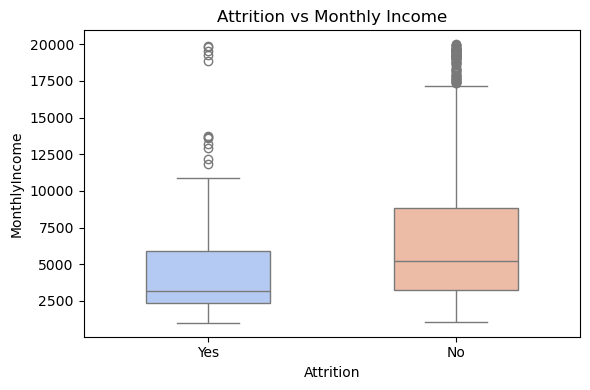

In [19]:
# Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm', width=0.5)
plt.title("Attrition vs Monthly Income")
plt.tight_layout()
plt.show()

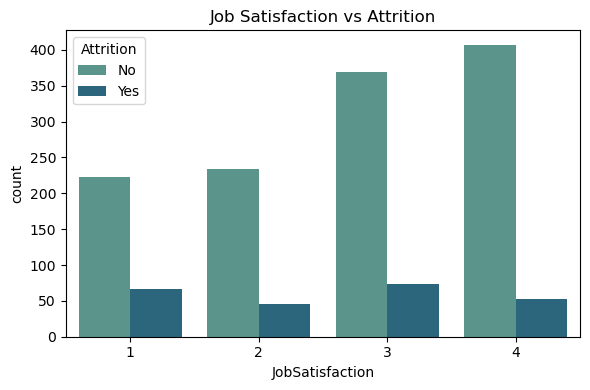

In [20]:
# Job Satisfaction vs Attrition
plt.figure(figsize=(6,4))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='crest')
plt.title("Job Satisfaction vs Attrition")
plt.tight_layout()
plt.show()

**Inference**:
* Employees who left the company (Attrition = Yes) generally have lower monthly incomes compared to those who stayed (Attrition = No).
* This suggests that low salary levels may contribute to higher attrition rates — employees earning less are more likely to leave.

### Correlation Analysis

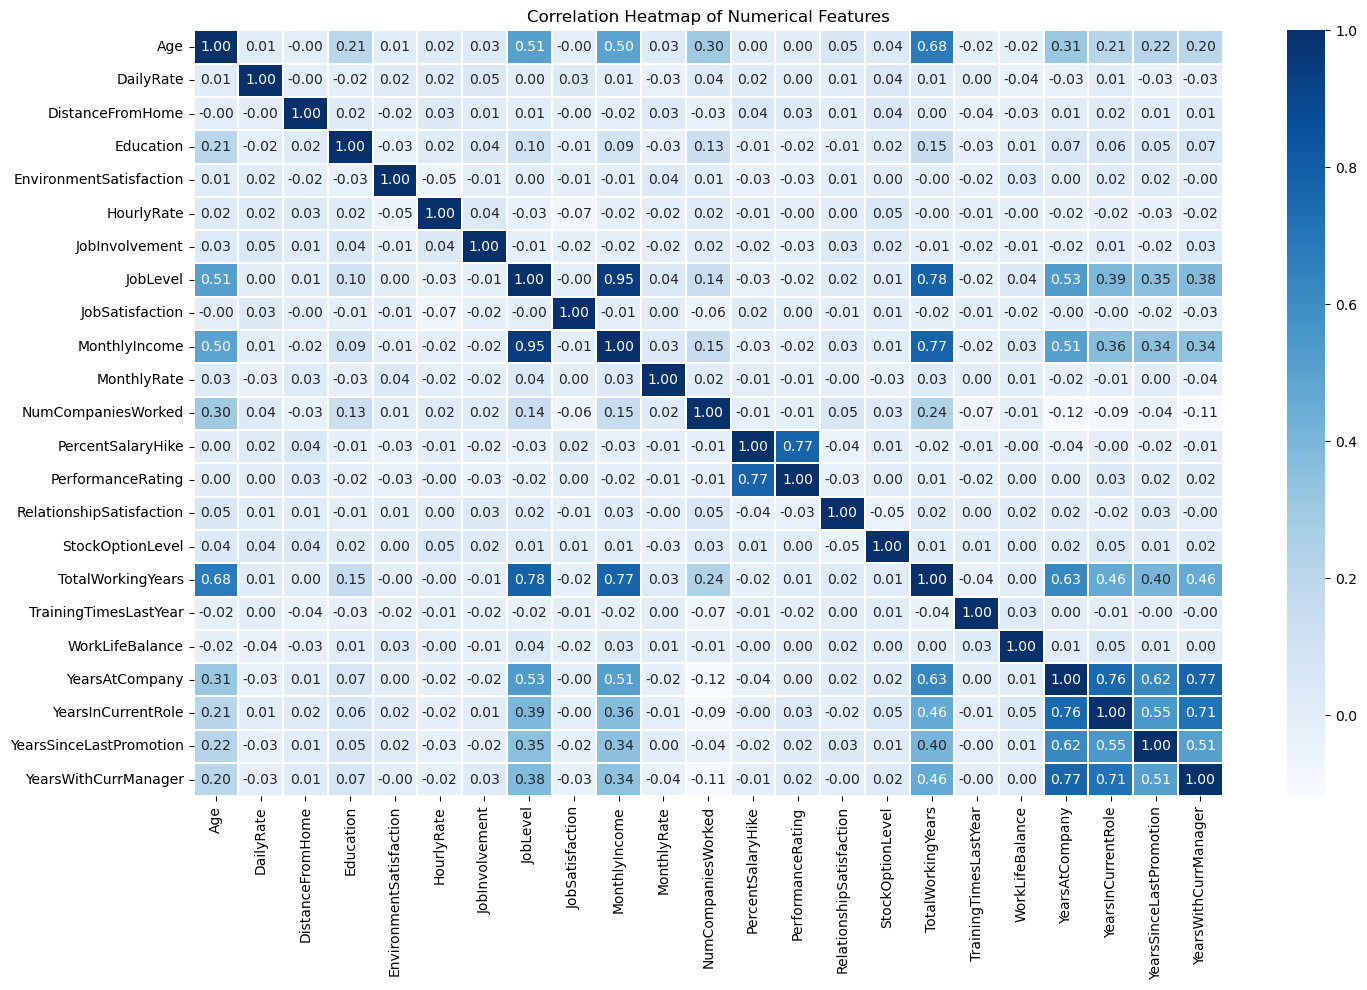

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), cmap = 'Blues', annot=True, fmt='.2f', linewidths=0.3)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


**INFERENCE:**

* Joblevel, MonthlyIncome and TotalWorkingYears show a strong positive correction, meaning experienced employees at higher levels earn more.
* YearsAtCompany , YearnsInCurrentRole and YearWithCurrManager are highly related, showing emplyees tent to stay long in similar roles.
* Age is moderately correclated with monthlyIncome and TotalWorkingYears, indicating older employees usually earn more and have more experience.
* Features like DailyRate, DistanceFromHome and satisfaction score have weak or no correlation, meaning they don't strongly affect other numeric factors


# -------------------------- **Predicting Employee Attrition** -----------------------------

### Importing Libraries

In [22]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import joblib

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [24]:
df.shape

(1470, 31)

In [25]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [26]:
if df['OverTime'].dtype == 'object':
    df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

### Feature Engineering

In [27]:
df['TenureBucket'] = pd.cut(df['YearsAtCompany'],
                            bins=[-1,1,3,7,15,40],
                            labels=['<1 yr','1-3 yrs','4-7 yrs','8-15 yrs','15+ yrs'])

In [28]:
df['NoPromotionRecently'] = (df['YearsSinceLastPromotion'] > 5).astype(int)

In [29]:
df['YearsBeforeManager'] = df['YearsAtCompany'] - df['YearsWithCurrManager']

In [30]:
df['OvertimeLowPay'] = ((df['OverTime']==1) & (df['MonthlyIncome']<df['MonthlyIncome'].median())).astype(int)

In [31]:
print("After feature engineering:", df.shape)

After feature engineering: (1470, 35)


### Train-Test Split

In [32]:
X = df.drop("Attrition", axis=1) #Features
y = df["Attrition"] #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Preprocessing

In [33]:
# Identify columns
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

In [34]:
# Pipelines for columns
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [35]:
# Combine
preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


In [36]:
# Preprocess + SMOTE
pipe = ImbPipeline([
    ("prep", preprocess),
    ("smote", SMOTE(random_state=1))
])

### Apply Preprocessing + SMOTE

In [37]:
X_train_balanced, y_train_balanced = pipe.fit_resample(X_train, y_train)

print("\nBefore SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", pd.Series(y_train_balanced).value_counts())
print("\nProcessed shape:", X_train_balanced.shape)



Before SMOTE: Attrition
0    986
1    190
Name: count, dtype: int64

After SMOTE: Attrition
0    986
1    986
Name: count, dtype: int64

Processed shape: (1972, 53)


### Transform Test Set (No Smote)

In [38]:
X_test_processed = preprocess.transform(X_test)

### Model Selection + Hyperparameter Tuning

In [39]:
param_grids = {

    "Logistic Regression": { },

    "Random Forest": {
        "n_estimators": [100, 200, 300, 500],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },

    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [2, 3, 4],
        "subsample": [0.7, 0.9, 1.0]
    },

    "XGBoost": {
        "n_estimators": [200, 300, 500],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 4, 5, 6],
        
    }
}

base_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False)
}

In [40]:
best_models = {}
results = {}

# TUNING LOOP
for name, model in base_models.items():
    print("\n=========================================================")
    print("TUNING:", name)
    print("=========================================================")

    search_params = param_grids[name]

    if search_params:
        tuner = RandomizedSearchCV(
            estimator=model,
            param_distributions=search_params,
            n_iter=20,
            scoring="roc_auc",
            cv=3,
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        tuner.fit(X_train_balanced, y_train_balanced)
        best_model = tuner.best_estimator_
        print("\nBest params:", tuner.best_params_)
    else:
        model.fit(X_train_balanced, y_train_balanced)
        best_model = model
        print("\nBest params: Used default parameters.")

    best_models[name] = best_model

    preds = best_model.predict(X_test_processed)
    probs = best_model.predict_proba(X_test_processed)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1": f1_score(y_test, preds),
        "ROC_AUC": roc_auc_score(y_test, probs)
    }
    print("Results:", results[name])


TUNING: Logistic Regression

Best params: Used default parameters.
Results: {'Accuracy': 0.7244897959183674, 'Precision': 0.3425925925925926, 'Recall': 0.7872340425531915, 'F1': 0.4774193548387097, 'ROC_AUC': np.float64(0.8460677060901024)}

TUNING: Random Forest
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best params: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Results: {'Accuracy': 0.8571428571428571, 'Precision': 0.6, 'Recall': 0.3191489361702128, 'F1': 0.4166666666666667, 'ROC_AUC': np.float64(0.8420191230941511)}

TUNING: Gradient Boosting
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best params: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Results: {'Accuracy': 0.8673469387755102, 'Precision': 0.6111111111111112, 'Recall': 0.46808510638297873, 'F1': 0.5301204819277109, 'ROC_AUC': np.float64(0.8223791885605995)}

TUNING: XGBoost
Fitting 3 folds for each of 20 candidates, 

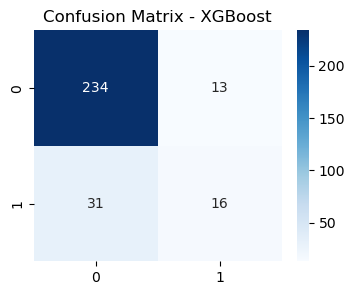

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {name}")
plt.show()

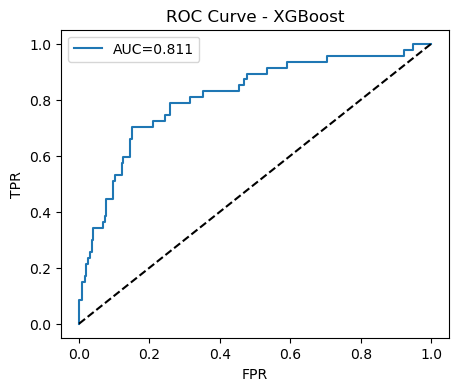

In [42]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC={results[name]['ROC_AUC']:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title(f"ROC Curve - {name}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

### Selecting Best Model

In [43]:
best_model_name = max(results, key=lambda m: results[m]["Accuracy"])
best_model = best_models[best_model_name]

print("\n=========================================================")
print(" BEST MODEL AFTER TUNING:", best_model_name)
print(results[best_model_name])
print("=========================================================")


 BEST MODEL AFTER TUNING: Gradient Boosting
{'Accuracy': 0.8673469387755102, 'Precision': 0.6111111111111112, 'Recall': 0.46808510638297873, 'F1': 0.5301204819277109, 'ROC_AUC': np.float64(0.8223791885605995)}


### Feature Importance from Best Model

In [44]:
final_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('model', best_model)
])

final_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',...
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(n_estimators=300, subsample=0.9))])

### Save Best Model

In [45]:
with open("best_model_final.pkl", "wb") as f:
    pickle.dump(final_pipe, f)

print("Model saved successfully as best_model_final.pkl")

Model saved successfully as best_model_final.pkl


# ----------------- **Predicting Employee Promotion Likelihood-** ----------------------

In [46]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureBucket,NoPromotionRecently,YearsBeforeManager,OvertimeLowPay
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,4-7 yrs,0,1,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,8-15 yrs,0,3,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,<1 yr,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,8-15 yrs,0,8,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1-3 yrs,0,0,0


### Feature Engineering

In [48]:
df['PromotionGap'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']
df['ExperienceRatio'] = df['YearsInCurrentRole'] / (df['TotalWorkingYears'] + 1)
df['HighPerformer'] = (df['PerformanceRating'] >= 4).astype(int)
df['TrainingEffect'] = df['TrainingTimesLastYear'] * df['PerformanceRating']

### Selected Features

In [49]:
X = df[['JobLevel','TotalWorkingYears','YearsInCurrentRole','PerformanceRating','Education','YearsAtCompany','JobRole','Department',
'TrainingTimesLastYear','WorkLifeBalance','PromotionGap','ExperienceRatio','HighPerformer','TrainingEffect']]
y = df['YearsSinceLastPromotion']

In [50]:
# Discretize target for balancing visualization
y_binned = pd.qcut(y, q=4, labels=False, duplicates='drop')


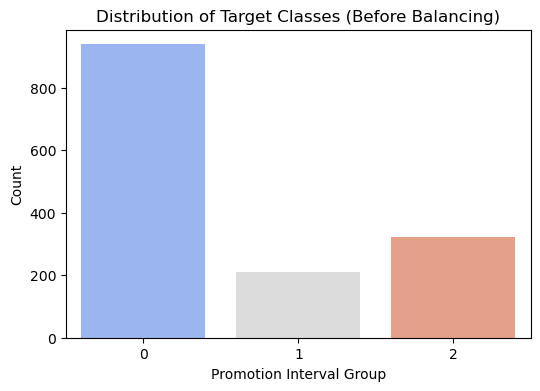

In [51]:
# Visualize Target Distribution Before Balancing
plt.figure(figsize=(6,4))
sns.countplot(x=y_binned, palette='coolwarm')
plt.title('Distribution of Target Classes (Before Balancing)')
plt.xlabel('Promotion Interval Group')
plt.ylabel('Count')
plt.show()

### Train-Test Split

In [52]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=1, stratify=y_binned)

### RandomUnderSamplping for Balancing

In [53]:
from imblearn.under_sampling import RandomUnderSampler


In [54]:
rus = RandomUnderSampler(random_state=1)
X_res, y_res = rus.fit_resample(X_train, y_train)

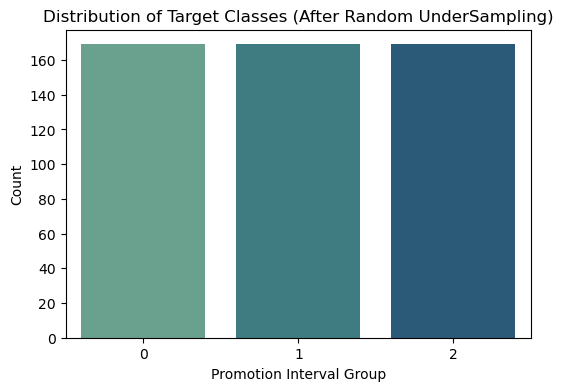

In [55]:
# Visualize Target Distribution After Balancing
plt.figure(figsize=(6,4))
sns.countplot(x=y_res, palette='crest')
plt.title('Distribution of Target Classes (After Random UnderSampling)')
plt.xlabel('Promotion Interval Group')
plt.ylabel('Count')
plt.show()

### Pre-Processing

In [56]:
#Preprocessing
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns

In [57]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])


cat_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
('num', num_pipeline, num_cols),
('cat', cat_pipeline, cat_cols)
])

### Selecting Models

In [58]:
#Models for Comparison
models = {
'Linear Regression': LinearRegression(),
'Random Forest': RandomForestRegressor(random_state=1),
'Gradient Boosting': GradientBoostingRegressor(random_state=1),
'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse'),
}

### Hyperparameter Tuning

In [59]:
#Hyperparameter Tuning for Gradient Boosting
param_grid = {
'model__n_estimators': [50, 100, 150],
'model__learning_rate': [0.01, 0.02, 0.1],
'model__max_depth': [2, 3, 4]
}


gb_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', GradientBoostingRegressor(random_state=42))
])
search = RandomizedSearchCV(gb_pipe, param_distributions=param_grid, cv=3, n_iter=3, scoring='r2', random_state=42)
search.fit(X_train, y_train)
print("Best Gradient Boosting Parameters:", search.best_params_)

Best Gradient Boosting Parameters: {'model__n_estimators': 150, 'model__max_depth': 4, 'model__learning_rate': 0.01}


In [60]:
#Train and Evaluate All Models
results = []

for name, model in models.items():
    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersample', RandomUnderSampler(random_state=42)),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({'Model': name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2 Score': r2})

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\nModel Performance Summary:\n", results_df)


Model Performance Summary:
                Model       MSE      RMSE       MAE  R2 Score
3            XGBoost  0.080533  0.283784  0.118715  0.881439
1      Random Forest  0.080796  0.284246  0.131122  0.881052
2  Gradient Boosting  0.090625  0.301040  0.175257  0.866582
0  Linear Regression  0.212135  0.460581  0.412042  0.687694


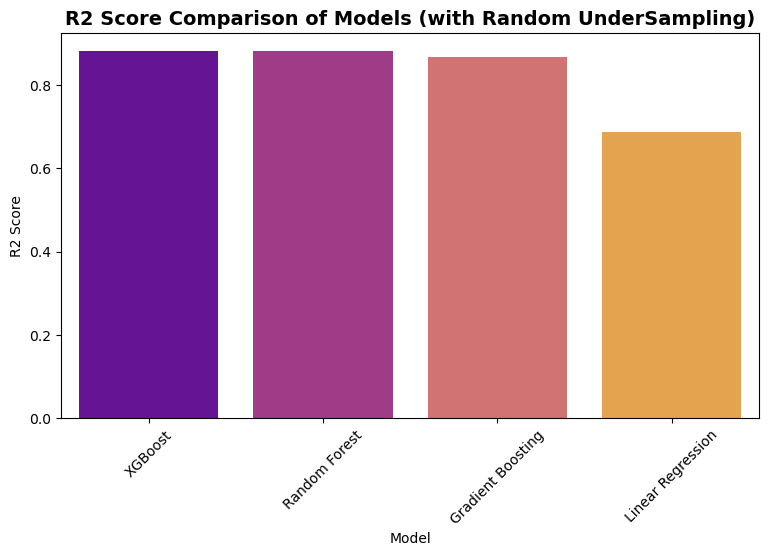

In [61]:
#Visualization
plt.figure(figsize=(9,5))
sns.barplot(data=results_df, x='Model', y='R2 Score', palette='plasma')
plt.title('R2 Score Comparison of Models (with Random UnderSampling)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### Feature Importance from the Best Model

In [62]:
best_model_name = results_df.iloc[0]['Model']
final_model = models[best_model_name]
final__pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', final_model)
])
final__pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['JobLevel', 'TotalWorkingYears', 'YearsInCurrentRole',
       'PerformanceRating', 'Education', 'YearsAtCompany',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'PromotionGap',
       'ExperienceRatio', 'High...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [63]:
#Final Summary
print(f"Best Performing Model: {best_model_name}")
print(results_df)

Best Performing Model: XGBoost
               Model       MSE      RMSE       MAE  R2 Score
3            XGBoost  0.080533  0.283784  0.118715  0.881439
1      Random Forest  0.080796  0.284246  0.131122  0.881052
2  Gradient Boosting  0.090625  0.301040  0.175257  0.866582
0  Linear Regression  0.212135  0.460581  0.412042  0.687694


### Save the Best Model

In [64]:
with open("best_promotion_model.pkl", "wb") as f:
    pickle.dump(final__pipe, f)

print("\nSaved:")
print(" → best_promotion_model.pkl")


Saved:
 → best_promotion_model.pkl
